In [1]:
import ROOT
import numpy as np

# Create histograms
h1_no_sumw2 = ROOT.TH1F("h1_no_sumw2", "Histogram 1 without Sumw2", 100, 0, 10)
h2_no_sumw2 = ROOT.TH1F("h2_no_sumw2", "Histogram 2 without Sumw2", 100, 0, 10)

# Fill the histograms with weights equal to 1
for value in np.random.normal(5, 1, 1000):
    h1_no_sumw2.Fill(value, 1.0)

for value in np.random.normal(5, 1, 1000):
    h2_no_sumw2.Fill(value, 1.0)

# Scale the histograms
scaling_factor1 = 2.0
scaling_factor2 = 3.0
h1_no_sumw2.Scale(scaling_factor1)
h2_no_sumw2.Scale(scaling_factor2)

# Manually calculate the expected error
bin_num = 50
content_h1_no_sumw2 = h1_no_sumw2.GetBinContent(bin_num) / scaling_factor1  # original content of h1
content_h2_no_sumw2 = h2_no_sumw2.GetBinContent(bin_num) / scaling_factor2  # original content of h2
expected_error_h1_no_sumw2 = np.sqrt(content_h1_no_sumw2) * scaling_factor1
expected_error_h2_no_sumw2 = np.sqrt(content_h2_no_sumw2) * scaling_factor2
expected_error_no_sumw2 = np.sqrt(expected_error_h1_no_sumw2**2 + expected_error_h2_no_sumw2**2)

# Add histograms
h1_no_sumw2.Add(h2_no_sumw2)

# Print the content and error of a bin after addition
content_no_sumw2 = h1_no_sumw2.GetBinContent(bin_num)
error_no_sumw2 = h1_no_sumw2.GetBinError(bin_num)
print(f"Without Sumw2 - Bin {bin_num} after scaling and addition: content = {content_no_sumw2}, error = {error_no_sumw2}")
print(f"Expected error (without Sumw2): {expected_error_no_sumw2}")


Welcome to JupyROOT 6.30/04
Without Sumw2 - Bin 50 after scaling and addition: content = 199.0, error = 22.693611435820433
Expected error (without Sumw2): 22.693611435820433


In [2]:
import ROOT
import numpy as np

# Create histograms
h1 = ROOT.TH1F("h1", "Histogram 1 with Sumw2", 100, 0, 10)
h2 = ROOT.TH1F("h2", "Histogram 2 with Sumw2", 100, 0, 10)

# Enable Sumw2 for both histograms
h1.Sumw2()
h2.Sumw2()

# Fill the histograms with weights equal to 1
for value in np.random.normal(5, 1, 1000):
    h1.Fill(value, 1.0)

for value in np.random.normal(5, 1, 1000):
    h2.Fill(value, 1.0)

# Scale the histograms
scaling_factor1 = 2.0
scaling_factor2 = 3.0
h1.Scale(scaling_factor1)
h2.Scale(scaling_factor2)

# Manually calculate the expected error
bin_num = 50
content_h1 = h1.GetBinContent(bin_num) / scaling_factor1  # original content of h1
content_h2 = h2.GetBinContent(bin_num) / scaling_factor2  # original content of h2
expected_error_h1 = np.sqrt(content_h1) * scaling_factor1
expected_error_h2 = np.sqrt(content_h2) * scaling_factor2
expected_error_with_sumw2 = np.sqrt(expected_error_h1**2 + expected_error_h2**2)

# Add histograms
h1.Add(h2)

# Print the content and error of a bin after addition
content_with_sumw2 = h1.GetBinContent(bin_num)
error_with_sumw2 = h1.GetBinError(bin_num)
print(f"With Sumw2 - Bin {bin_num} after scaling and addition: content = {content_with_sumw2}, error = {error_with_sumw2}")
print(f"Expected error (with Sumw2): {expected_error_with_sumw2}")


With Sumw2 - Bin 50 after scaling and addition: content = 208.0, error = 23.40939982143925
Expected error (with Sumw2): 23.40939982143925


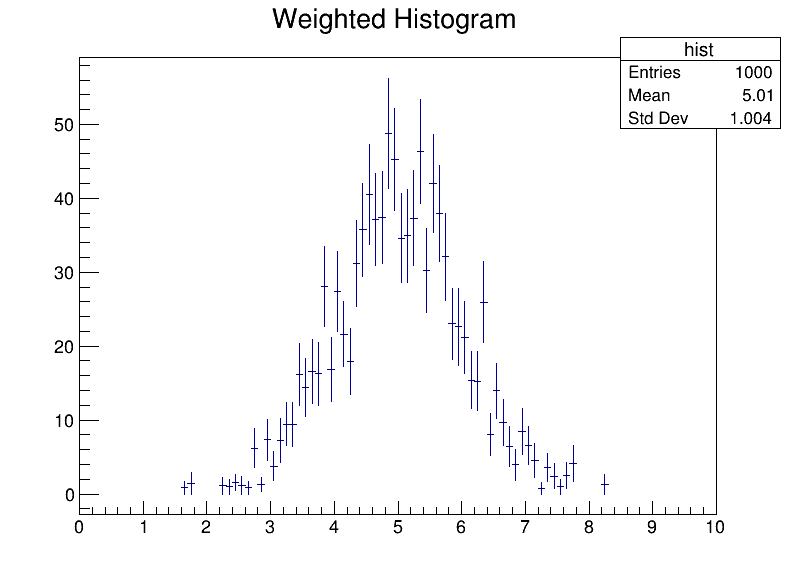

In [3]:
import ROOT
import numpy as np

# Create a histogram with Sumw2 enabled for accurate error propagation
hist = ROOT.TH1F("hist", "Weighted Histogram", 100, 0, 10)
hist.Sumw2()

# Generate some data with associated weights
data = np.random.normal(5, 1, 1000)
weights = np.random.uniform(0.5, 1.5, 1000)

# Fill the histogram with weighted data
for value, weight in zip(data, weights):
    hist.Fill(value, weight)

# Draw the histogram
canvas = ROOT.TCanvas("canvas", "Canvas", 800, 600)
hist.Draw()
canvas.Draw()
# canvas.SaveAs("weighted_histogram.png")


In [1]:
import ROOT
import numpy as np

# Create two histograms
h1 = ROOT.TH1F("h1", "Histogram 1", 100, 0, 10)
h2 = ROOT.TH1F("h2", "Histogram 2", 100, 0, 10)

# Enable Sumw2 for accurate error propagation
# h1.Sumw2()
# h2.Sumw2()

# Fill the histograms with some random data
data1 = np.random.normal(5, 1, 1000)
data2 = np.random.normal(5, 1, 1000)

for value in data1:
    h1.Fill(value, 1.0)  # Fill with weight 1.0

for value in data2:
    h2.Fill(value, 1.0)  # Fill with weight 1.0

# Multiply the histograms
h_result = h1.Clone("h_result")  # Clone h1 to h_result
h_result.Multiply(h2)

# Print the content and error of a bin after multiplication
bin_num = 50
content_result = h_result.GetBinContent(bin_num)
error_result = h_result.GetBinError(bin_num)
print(f"After multiplication - Bin {bin_num}: content = {content_result}, error = {error_result}")

# Manually calculate the expected bin content and error
content_h1 = h1.GetBinContent(bin_num)
content_h2 = h2.GetBinContent(bin_num)
error_h1 = h1.GetBinError(bin_num)
error_h2 = h2.GetBinError(bin_num)

# Expected content and error after multiplication
expected_content = content_h1 * content_h2
expected_error = np.sqrt((content_h2 * error_h1)**2 + (content_h1 * error_h2)**2)

print(f"Expected - Bin {bin_num}: content = {expected_content}, error = {expected_error}")


Welcome to JupyROOT 6.30/04
After multiplication - Bin 50: content = 1680.0, error = 40.98780306383839
Expected - Bin 50: content = 1680.0, error = 373.4166573681469
